In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../../../data/prepared/df_energy_climate_2020.csv')
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

In [3]:
df.head(3)

,wind_speed,solar_radiation,temperature,nuclear_power,not_renewable,renewable,energy_price,hour,dayofweek,month,date
datetime,,,,,,,,,,,
2020-01-01 00:00:00,2.4,0,-0.1,8088.21750,29512.74850,14541.30200,38.60,0.0,2.0,1.0,2020-01-01
2020-01-01 01:00:00,2.4,0,-0.5,8081.15875,29178.66275,14949.45575,36.55,1.0,2.0,1.0,2020-01-01
2020-01-01 02:00:00,2.5,0,-0.7,8071.44750,29414.36225,15077.92500,32.32,2.0,2.0,1.0,2020-01-01


In [4]:
df.describe()

,wind_speed,solar_radiation,temperature,nuclear_power,not_renewable,renewable,energy_price,hour,dayofweek,month
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,3.697757,136.898110,10.342987,6934.673246,33765.069651,27962.757734,30.471738,11.500000,2.997268,6.513661
std,1.509119,204.334284,6.927171,969.007750,11153.160609,12083.398906,17.501777,6.922581,1.995325,3.451430
min,1.300000,0.000000,-3.800000,3778.562500,12031.295000,7868.889000,-83.940000,0.000000,0.000000,1.000000
25%,2.600000,0.000000,4.600000,6449.072375,25596.779063,18187.097938,21.750000,5.750000,1.000000,4.000000
50%,3.400000,10.000000,9.700000,6793.803375,32783.599125,26601.655125,30.990000,11.500000,3.000000,7.000000
75%,4.400000,212.250000,15.400000,7833.245750,39941.688938,36812.760000,40.250000,17.250000,5.000000,10.000000
max,11.600000,910.000000,31.900000,8178.095500,68865.521000,68749.836250,200.040000,23.000000,6.000000,12.000000


In [5]:
df_energy = df[['energy_price', 'hour', 'month', 'dayofweek', 'date']].copy()

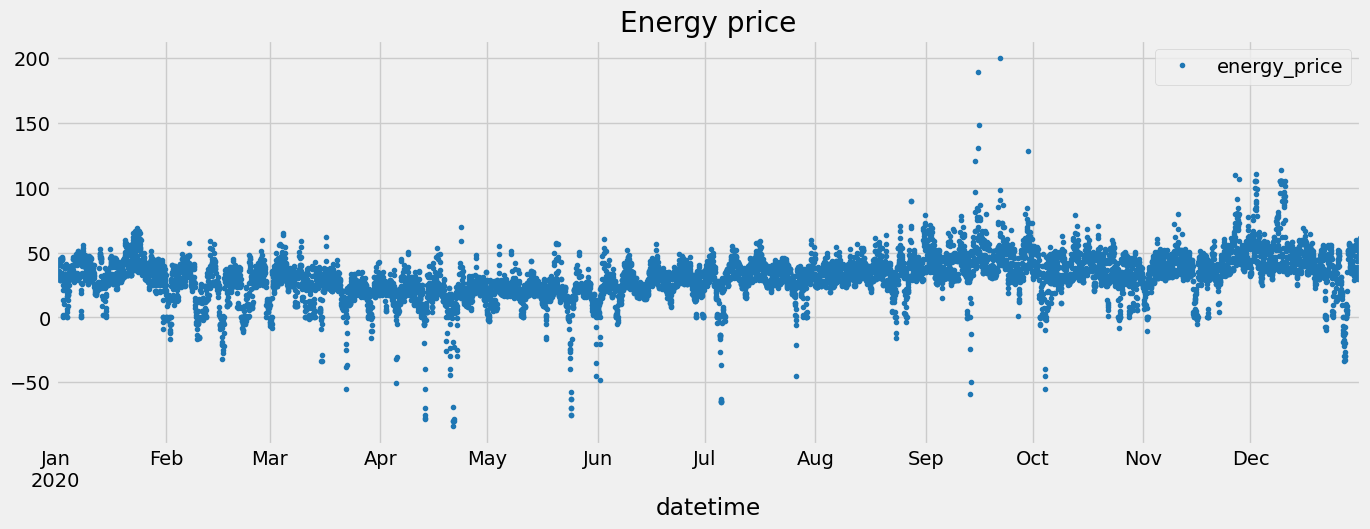

In [6]:
df_energy.plot(
    y='energy_price', 
    style='.', figsize=(15, 5), 
    color=color_pal[0], 
    title='Energy price'
)
plt.show()

## Train / Test Split

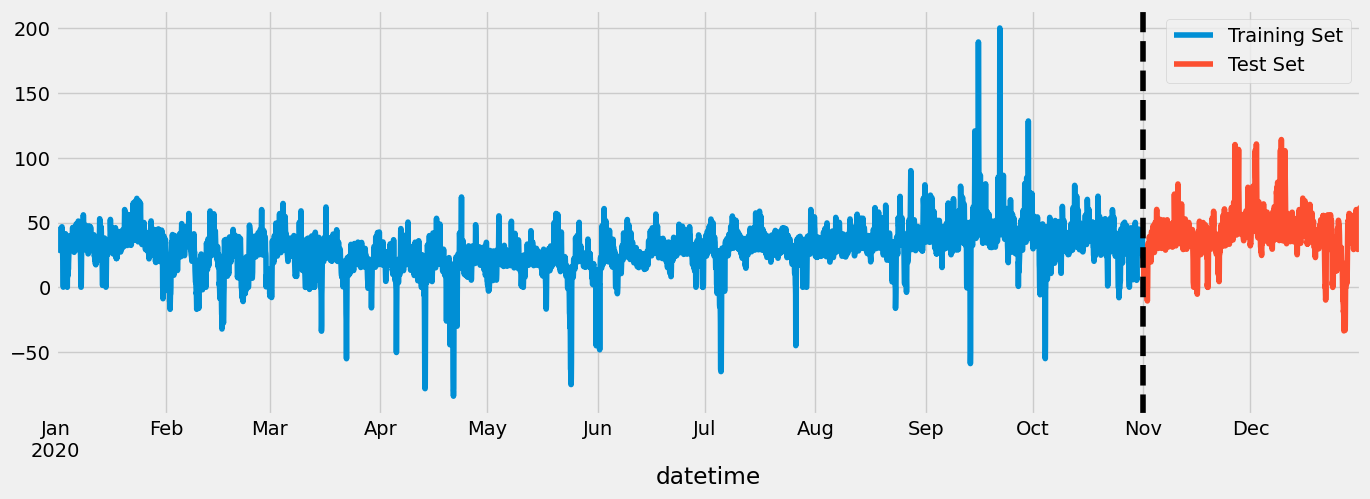

In [7]:
train = df_energy.loc[df_energy.index < '2020-11-01']
test = df_energy.loc[df_energy.index >= '2020-11-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, y='energy_price', label='Training Set')
test.plot(ax=ax, y='energy_price', label='Test Set')
ax.axvline('2020-11-01', color='black', ls='--')
plt.show()

<AxesSubplot: xlabel='datetime'>

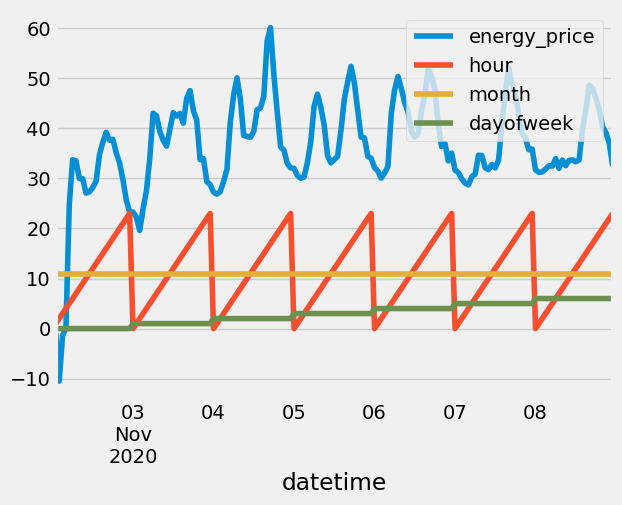

In [8]:
df_energy.loc[(df_energy.index > '2020-11-02') & (df_energy.index < '2020-11-09')].plot()

## Visualize our Feature / Target Relationship

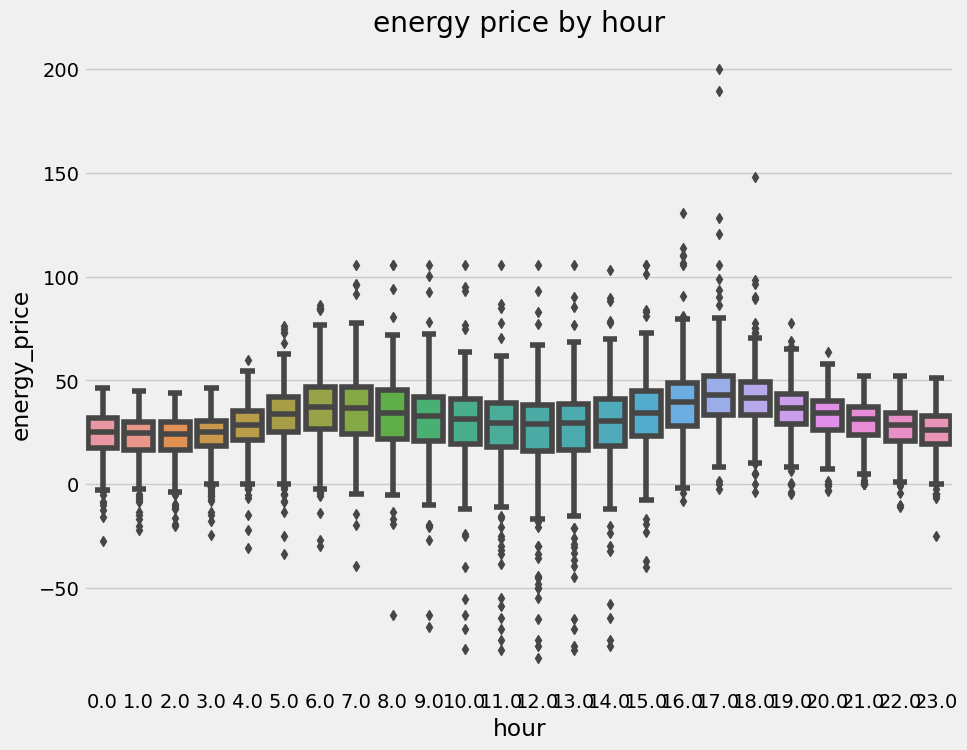

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(
    data=df_energy,
    x='hour',
    y='energy_price'
)
ax.set_title('energy price by hour')
plt.show()

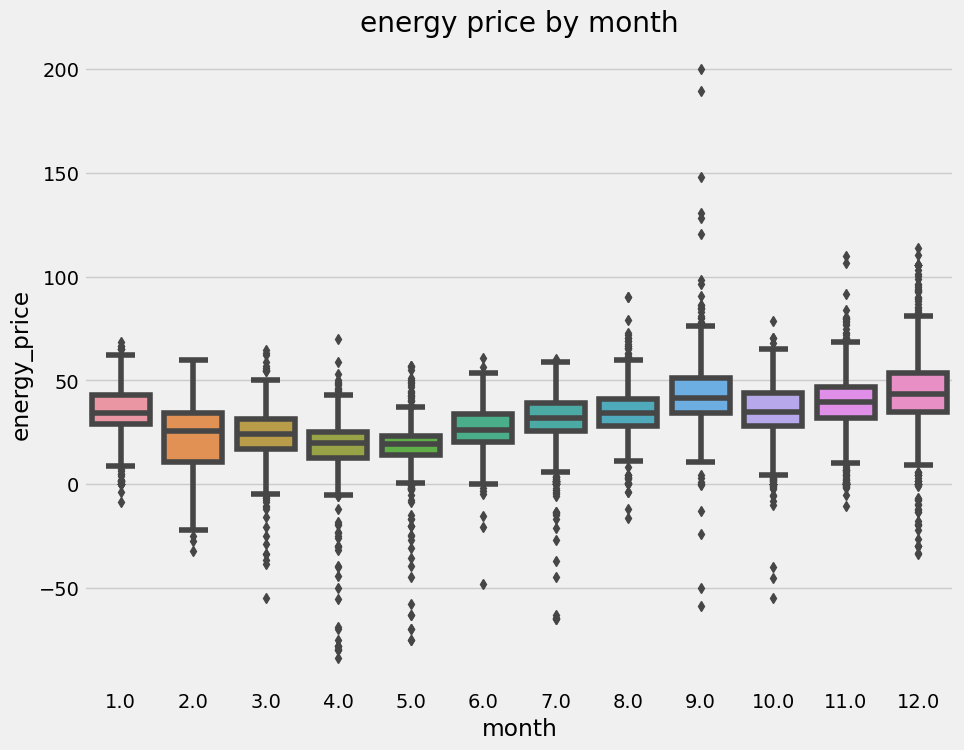

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(
    data=df_energy,
    x='month',
    y='energy_price'
)
ax.set_title('energy price by month')
plt.show()

Text(0.5, 1.0, 'energy price by day of week')

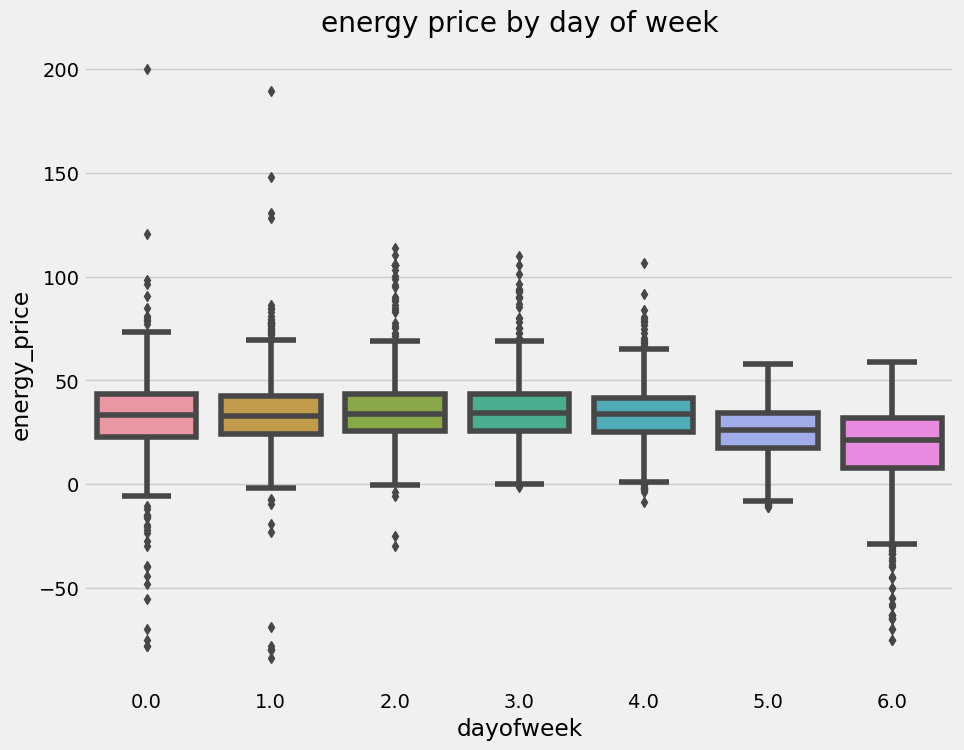

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(
    data=df_energy,
    x='dayofweek',
    y='energy_price'
)
ax.set_title('energy price by day of week')

## Create our Model

In [12]:
FEATURES = ['hour', 'month', 'dayofweek']
TARGET = 'energy_price'

In [13]:
X_train=train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [14]:
reg = xgb.XGBRegressor(
    n_estimators=1000, 
    early_stopping_rounds=50, 
    learning_rate=0.001
)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:32.32391	validation_1-rmse:44.62233
[100]	validation_0-rmse:29.67676	validation_1-rmse:41.37202
[200]	validation_0-rmse:27.30528	validation_1-rmse:38.58963
[300]	validation_0-rmse:25.18541	validation_1-rmse:36.12114
[400]	validation_0-rmse:23.29959	validation_1-rmse:33.93894
[500]	validation_0-rmse:21.62629	validation_1-rmse:32.01300
[600]	validation_0-rmse:20.14360	validation_1-rmse:30.30519
[700]	validation_0-rmse:18.82864	validation_1-rmse:28.75867
[800]	validation_0-rmse:17.67079	validation_1-rmse:27.34102
[900]	validation_0-rmse:16.65259	validation_1-rmse:26.08468
[999]	validation_0-rmse:15.76649	validation_1-rmse:24.98299


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Feature Importance

In [15]:
fi = pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=['importance'])

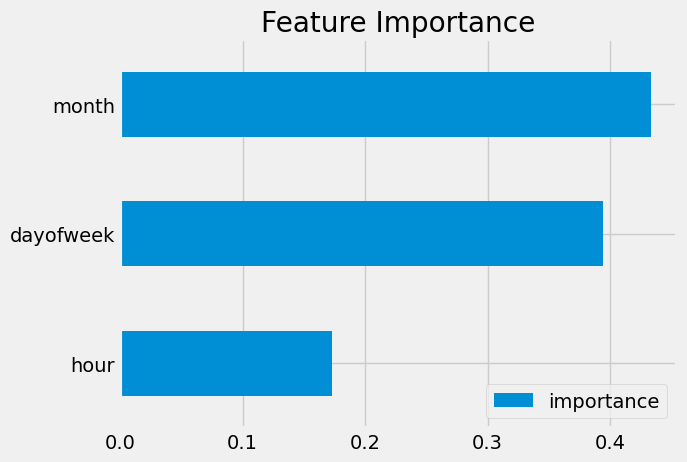

In [16]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast on Test

In [17]:
test['prediction'] = reg.predict(X_test)

/var/folders/cz/cwy65nds1w7_vfh7mtxwrks40000gn/T/ipykernel_34373/2903689382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [18]:
df_energy = df_energy.merge(
    test[['prediction']], 
    how='left', left_index=True, 
    right_index=True
)

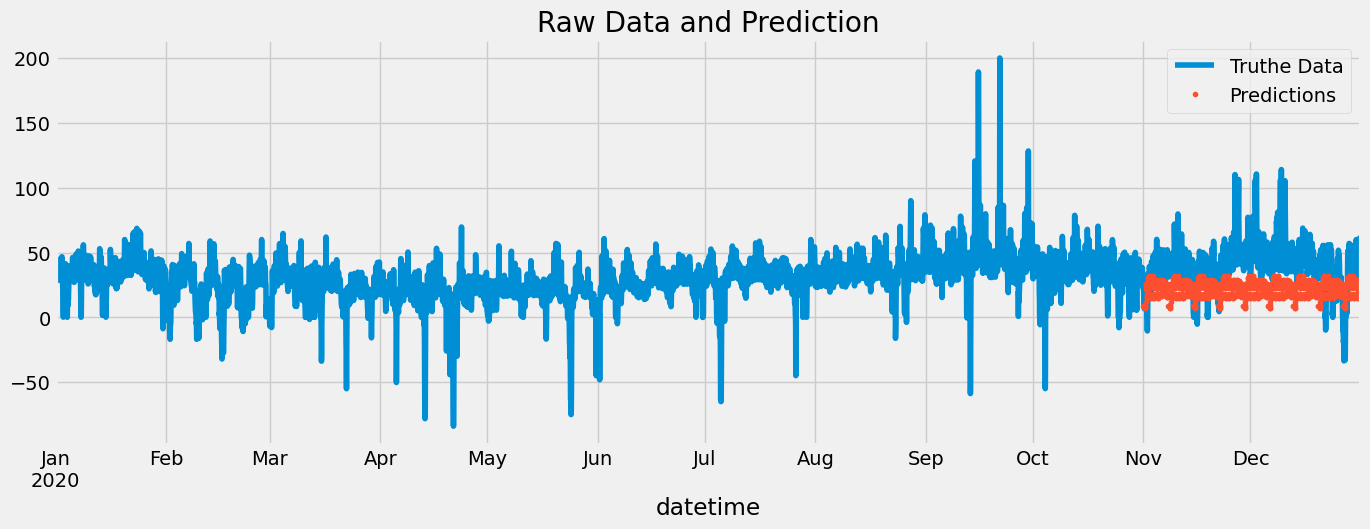

In [19]:
ax = df_energy[['energy_price']].plot(figsize=(15, 5))
df_energy['prediction'].plot(ax=ax, style='.')
plt.legend(['Truthe Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

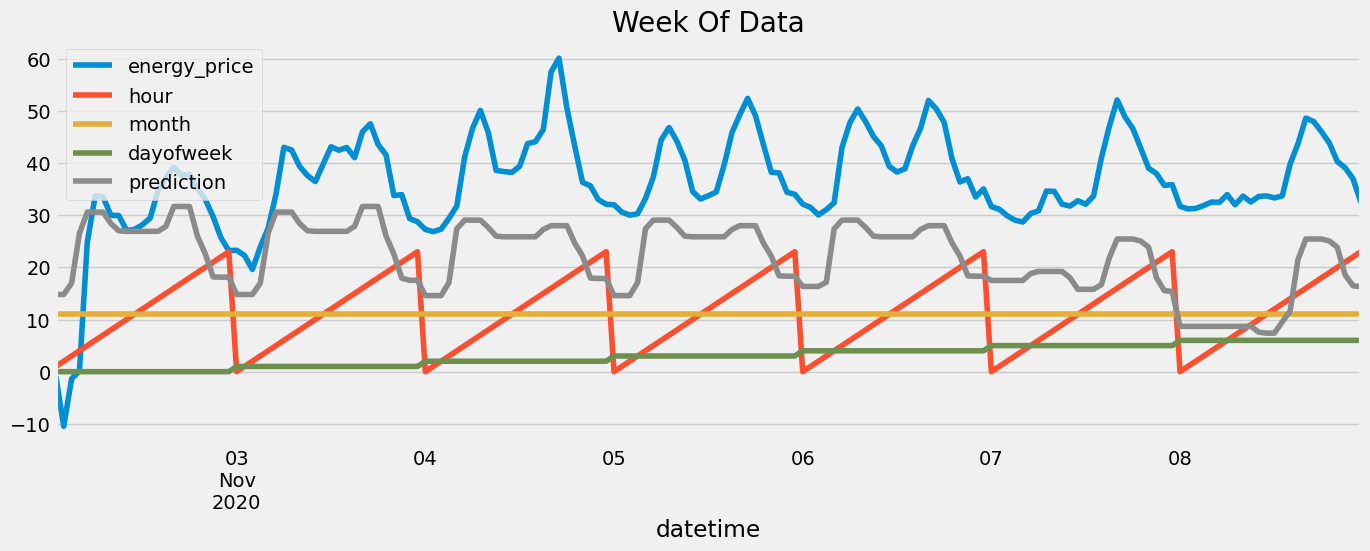

In [20]:
df_energy.loc[(df_energy.index > '2020-11-02') & (df_energy.index < '2020-11-09')].plot(figsize=(15,5), title='Week Of Data')
plt.show()

In [21]:
score = np.sqrt(mean_squared_error(test['energy_price'], test['prediction']))
print(f'RMSE Score on Test set: {score:.2f}')

RMSE Score on Test set: 24.98


## Calculate Error
- Look at the worst and best predicted days

In [22]:
test['error'] = np.abs(test[TARGET] - test['prediction'])

/var/folders/cz/cwy65nds1w7_vfh7mtxwrks40000gn/T/ipykernel_34373/1709595864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[TARGET] - test['prediction'])


In [23]:
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head()

date
2020-12-09    51.288872
2020-12-02    49.987622
2020-12-10    45.575022
2020-11-27    40.820960
2020-12-08    36.292551
Name: error, dtype: float64

In [24]:
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head()

date
2020-11-01     6.808899
2020-11-02     8.407199
2020-11-15     8.990584
2020-12-26     9.232255
2020-11-21    10.469257
Name: error, dtype: float64

## Outlier Analysis and Removal

<AxesSubplot: ylabel='Frequency'>

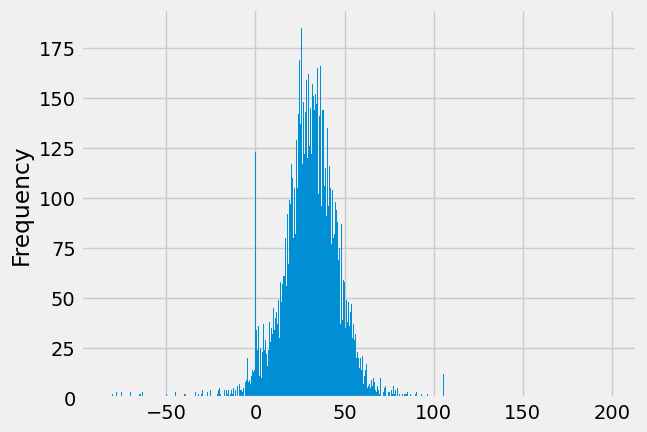

In [25]:
df_energy['energy_price'].plot(kind='hist', bins=500)

<AxesSubplot: xlabel='datetime'>

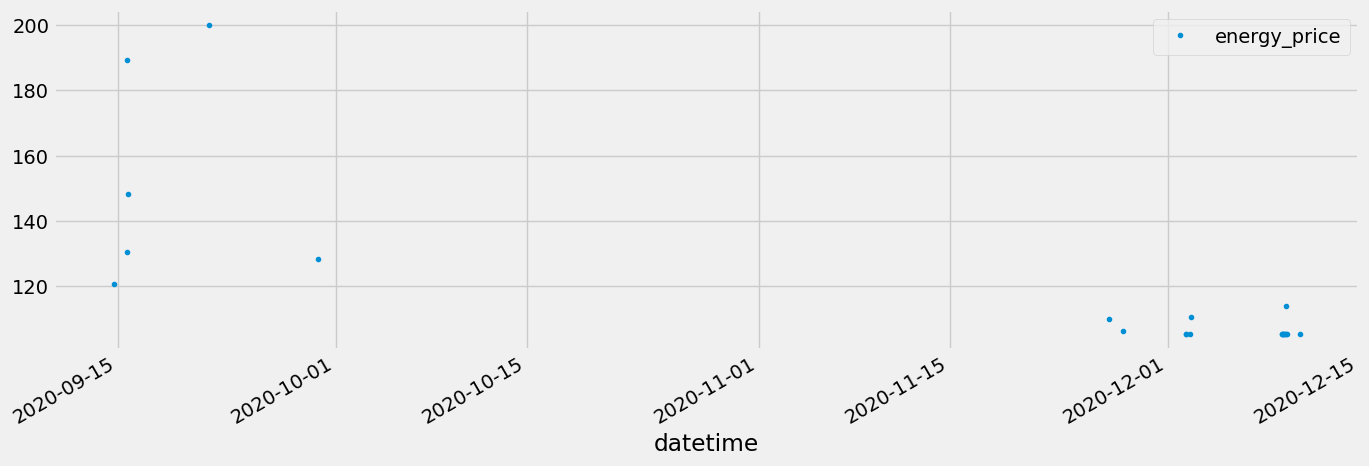

In [26]:
df_energy.query('energy_price > 105').plot(y='energy_price', figsize=(15, 5), style='.')

<AxesSubplot: xlabel='datetime'>

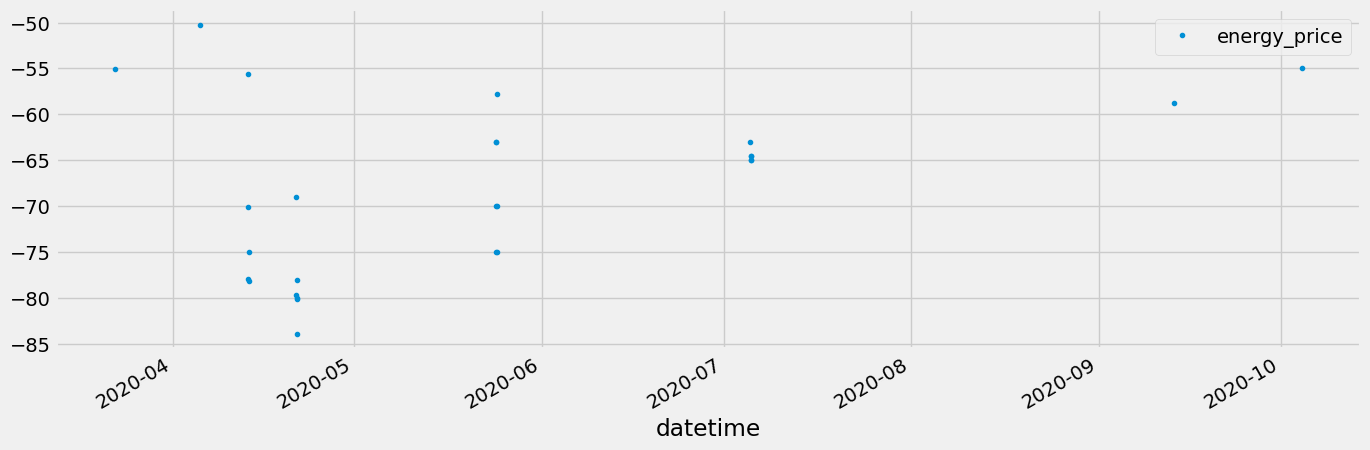

In [27]:
df_energy.query('energy_price < -50').plot(y='energy_price', figsize=(15, 5), style='.')

In [28]:
df_energy = df_energy.query('energy_price < 105').copy()

In [29]:
df_energy = df_energy.query('energy_price > -50').copy()

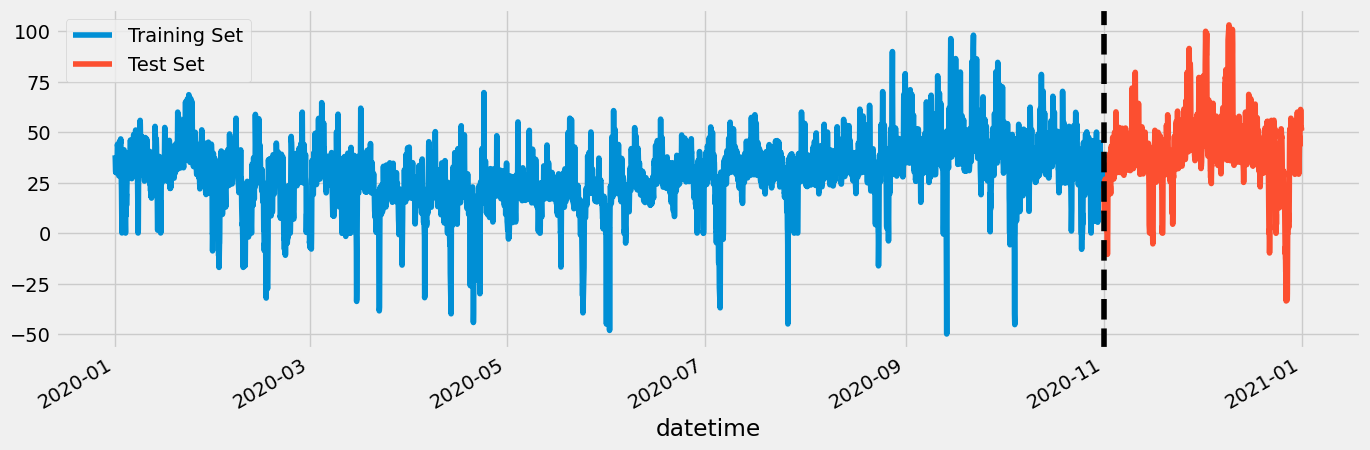

In [30]:
train = df_energy.loc[df_energy.index < '2020-11-01']
test = df_energy.loc[df_energy.index >= '2020-11-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, y='energy_price', label='Training Set')
test.plot(ax=ax, y='energy_price', label='Test Set')
ax.axvline('2020-11-01', color='black', ls='--')
plt.show()

## Time Series Cross Validation

In [31]:
from sklearn.model_selection import TimeSeriesSplit

In [32]:
# gap = gap between train and test sets
tss = TimeSeriesSplit(n_splits=5, test_size=168, gap=24)
df = df.sort_index()

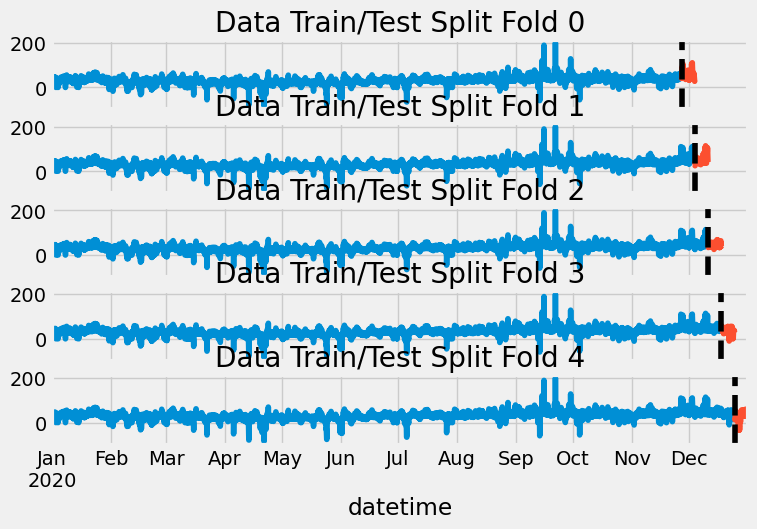

In [33]:
fig, axs = plt.subplots(5, figsize=(8, 5), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['energy_price'].plot(ax=axs[fold],
                               label='Training Set',
                               title=f'Data Train/Test Split Fold {fold}')
    test['energy_price'].plot(ax=axs[fold],
                              label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold +=1

## Forecasting Horizon
The forecast horizon is the length of time into the future for which forecasts are to be prepared. These generally vary from short-term forecasting horizons (less than three months) to long-term horizens (more than two years)

## Lag Features
What was the target (x)days in the past

In [34]:
def add_lags(df):
    target_map = df_energy['energy_price'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('1 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('7 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('14 days')).map(target_map)
    return df

In [35]:
df_energy = add_lags(df_energy)

## Summarize

In [36]:
tss = TimeSeriesSplit(n_splits=5, test_size=168, gap=24)
df_energy = df_energy.sort_index()

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df_energy):
    train = df_energy.iloc[train_idx]
    test = df_energy.iloc[val_idx]

    FEATURES = ['hour', 'month', 'dayofweek']
    TARGET = 'energy_price'

    X_train = train[FEATURES]
    y_train = train[TARGET]
    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)
    
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[16:08:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32.00855	validation_1-rmse:55.73284
[100]	validation_0-rmse:15.78278	validation_1-rmse:33.66517
[200]	validation_0-rmse:11.44565	validation_1-rmse:26.27397
[300]	validation_0-rmse:10.32508	validation_1-rmse:23.75684
[400]	validation_0-rmse:9.88196	validation_1-rmse:22.83208
[500]	validation_0-rmse:9.64179	validation_1-rmse:22.51775
[600]	validation_0-rmse:9.47728	validation_1-rmse:22.41195
[700]	validation_0-rmse:9.36591	validation_1-rmse:22.30859
[800]	validation_0-rmse:9.27421	validation_1-rmse:22.12303
[900]	validation_0-rmse:9.21109	validation_1-rmse:21.95798
[999]	validation_0-rmse:9.15905	validation_1-rmse:21.84901
[16:08:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/r

In [37]:
print(f'Score across folds {np.mean(scores):.4f}')
print(f'Fold scores: {scores}')

Score across folds 15.2515
Fold scores: [21.849005066566384, 14.09625170592706, 5.875488073890092, 12.557974135659276, 21.878640807148518]


## Predicting the Future
- Retraining on all the data
- To predict the future we need an empty dataframe for future date ranges
- Run those dates through our feature creation code + lag creation

In [38]:
# Retrain on all data

FEATURES = ['hour', 'month', 'dayofweek']
TARGET = 'energy_price'

X_all = df_energy[FEATURES]
y_all = df_energy[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[16:08:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:33.75403
[100]	validation_0-rmse:16.70961
[200]	validation_0-rmse:12.24218
[300]	validation_0-rmse:11.14786
[400]	validation_0-rmse:10.73510
[499]	validation_0-rmse:10.50806


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [39]:
# Create future dataframe
future = pd.date_range('2021-01-01', '2021-01-07', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df_energy['isFuture'] = False
df_and_future = pd.concat([df_energy, future_df])
df_and_future = add_lags(df_and_future)

In [40]:
future_w_features = df_and_future.query('isFuture').copy()

## Predict the future

In [41]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

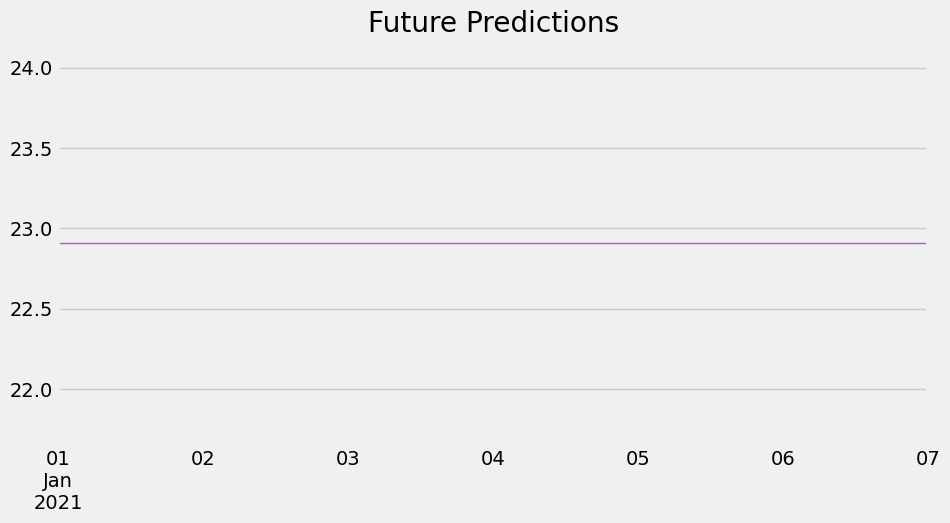

In [43]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

## Save model

In [44]:
reg.save_model('model.json')

In [45]:
reg_new = xgb.XGBRegressor()
reg_new.load_model('model.json')